In [17]:
import numpy as np
from pommerman import constants
from scipy.stats import describe
from matplotlib import pyplot as plt
# keep all outputs printed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# old dataset (no worries, code is compatible)
# path_to_labels = 'new_train_data/new_labels2.npy'
# path_to_save_indices = 'new_train_data/picked_indices.npy'

# new dataset format (multiple agents data)
path_to_labels = 'datasets/new/labels.npy'
path_to_save_indices = 'datasets/new/picked_indices.npy'

labels = np.load(path_to_labels)
labels.shape

print(np.sum(labels, axis=0) / len(labels)) # proportion of labels

if(len(labels.shape) == 2): # for the previous dataset format!
    labels = labels.reshape(-1, 1, 6)

(464514, 4, 6)

[[0.47439259 0.11948833 0.12813177 0.11669401 0.13479249 0.02650082]
 [0.5438286  0.11794908 0.09323939 0.10137477 0.12237306 0.0212351 ]
 [0.42555445 0.15149597 0.11595775 0.14590303 0.1319013  0.02918749]
 [0.52052683 0.11117857 0.11331844 0.12606509 0.10713994 0.02177114]]


In [18]:
# find how long each consequtive action took long
stop_action = (1,0,0,0,0,0)
up_action = (0,1,0,0,0,0)
down_action = (0,0,1,0,0,0)
left_action = (0,0,0,1,0,0)
right_action = (0,0,0,0,1,0)
bomb_action = (0,0,0,0,0,1)

def find_nonconseq_acts(event, labels): # our events are actions indeed
    matching_indices = np.where((labels == event).all(axis=1))[0]
    # for debugging purposes:
    # bound=30
    # print(matching_indices[:bound])
    #
    starts = []
    ends = []
    count =0
    prev_idx = -float('inf')
    for i, m in enumerate(matching_indices):
        if m-1 != prev_idx: # new stop action
            count += 1 # 
            starts.append(matching_indices[i]) # or just 'm'
            if prev_idx != -float('inf'):
                ends.append(matching_indices[i-1]) # add the end point of the previous action (i.e. stop action)
        prev_idx=m
        # if i >= bound: # for debug purpose
        # break
    ends.append(matching_indices[i]) # because last m is skipped from the above logic
    #
    # for debugging purposes:
    #print(starts[-10:])
    #print(ends[-10:])
    #print(starts[:10])
    #print(ends[:10])
    #print(count) # number of non-consequative stops
    #print(len(starts)) # starts length
    #print(len(ends)) # ends length
    assert len(ends) == len(starts) # nr starts and ends must match up
    #
    event_length = [] # length of steps that consequetive stop action executed
    for i in range(count):
        event_length.append(ends[i]-starts[i])
    return matching_indices, count, starts, ends, np.array(event_length)
    
# store action length of each agent    
stop_length = [None] * labels.shape[1]
up_length = [None] * labels.shape[1]
down_length = [None] * labels.shape[1]
left_length = [None] * labels.shape[1]
right_length = [None] * labels.shape[1]
bomb_length = [None] * labels.shape[1]

# iterate over action labels of each agent
for i in range(labels.shape[1]):
    print("Samples from agent ", i)
    _, count1, _, _, stop_length[i] = find_nonconseq_acts(stop_action, labels[:,i,:])
    _, count2, _, _, up_length[i] = find_nonconseq_acts(up_action, labels[:,i,:])
    _, count3, _, _, down_length[i] = find_nonconseq_acts(down_action, labels[:,i,:])
    _, count4, _, _, left_length[i] = find_nonconseq_acts(left_action, labels[:,i,:])
    _, count5, _, _, right_length[i] = find_nonconseq_acts(right_action, labels[:,i,:])
    _, count6, _, _, bomb_length[i] = find_nonconseq_acts(bomb_action, labels[:,i,:])

    np.sum(labels[:,i,:], axis=0)
    count1, count2, count3, count4, count5, count6
    
    print("fraction of non-consequetive actions to the total action of same type: ")
    count1/np.sum(labels[:,i,:], axis=0)[0]
    count2/np.sum(labels[:,i,:], axis=0)[1]
    count3/np.sum(labels[:,i,:], axis=0)[2]
    count4/np.sum(labels[:,i,:], axis=0)[3]
    count5/np.sum(labels[:,i,:], axis=0)[4]
    count6/np.sum(labels[:,i,:], axis=0)[5]

    # get further insight:
#     describe(stop_length[i])
#     describe(up_length[i])
#     describe(down_length[i])
#     describe(left_length[i])
#     describe(right_length[i])
#     describe(bomb_length[i])

Samples from agent  0


array([220362.,  55504.,  59519.,  54206.,  62613.,  12310.],
      dtype=float32)

(17895, 35603, 37177, 36135, 38914, 12306)

fraction of non-consequetive actions to the total action of same type: 


0.08120728619271925

0.6414492649178437

0.6246240696248256

0.6666236210013652

0.6215003274080463

0.9996750609260764

Samples from agent  1


array([252616.,  54789.,  43311.,  47090.,  56844.,   9864.],
      dtype=float32)

(15311, 32315, 29363, 30638, 32816, 9862)

fraction of non-consequetive actions to the total action of same type: 


0.06060977926972163

0.5898081731734472

0.6779571009674217

0.6506264599702697

0.5772992752093449

0.9997972424979724

Samples from agent  2


array([197676.,  70372.,  53864.,  67774.,  61270.,  13558.],
      dtype=float32)

(18050, 40385, 37140, 40799, 40035, 13556)

fraction of non-consequetive actions to the total action of same type: 


0.09131103421760861

0.5738788154379583

0.6895143323926927

0.6019860123351137

0.6534192916598661

0.9998524856173477

Samples from agent  3


array([241792.,  51644.,  52638.,  58559.,  49768.,  10113.],
      dtype=float32)

(16056, 32264, 33012, 34211, 32847, 10113)

fraction of non-consequetive actions to the total action of same type: 


0.06640418210693488

0.6247385949965146

0.6271514875185228

0.5842142113082532

0.6600024111879119

1.0

In [19]:
# beg = 20
# end = 80
# plt.figure(figsize=(17,7))
# plt.bar(range(beg,end), stop_length[beg:end])
# plt.bar(range(beg,end), down_length[beg:end])
# plt.bar(range(beg,end), left_length[beg:end])
# plt.bar(range(beg,end), right_length[beg:end])
# plt.bar(range(beg,end), bomb_length[beg:end])
# plt.legend(['stop', 'up', 'down', 'left', 'right', 'bomb'])
# plt.show()

# Plots to see consequative actions

#### Agent 0 #####


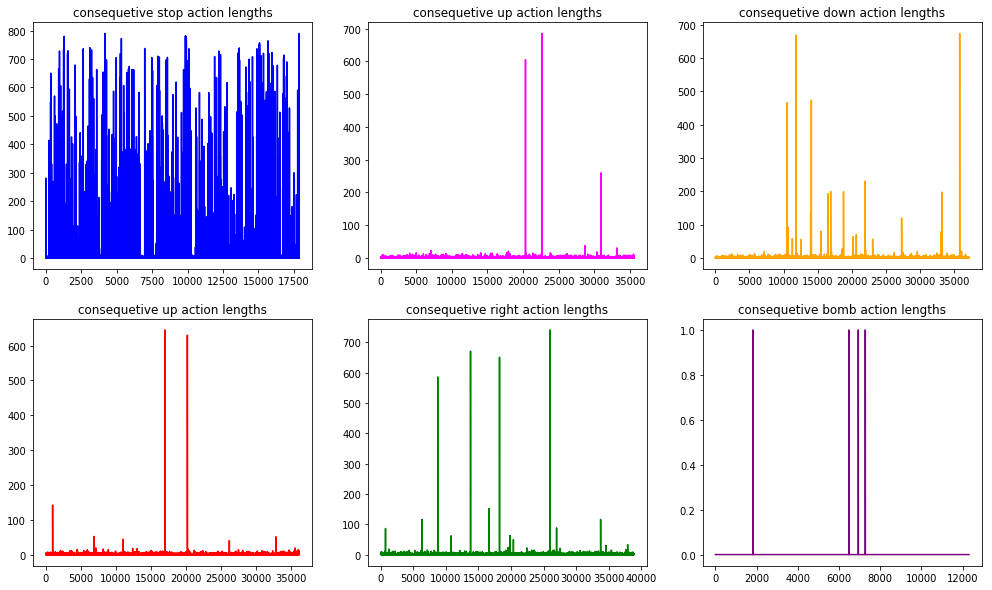

#### Agent 1 #####


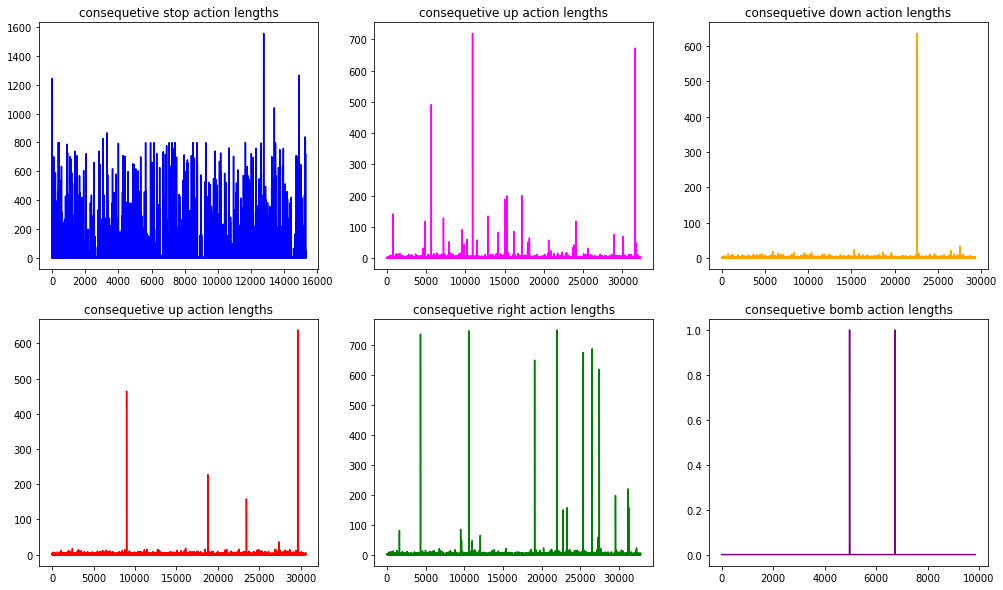

#### Agent 2 #####


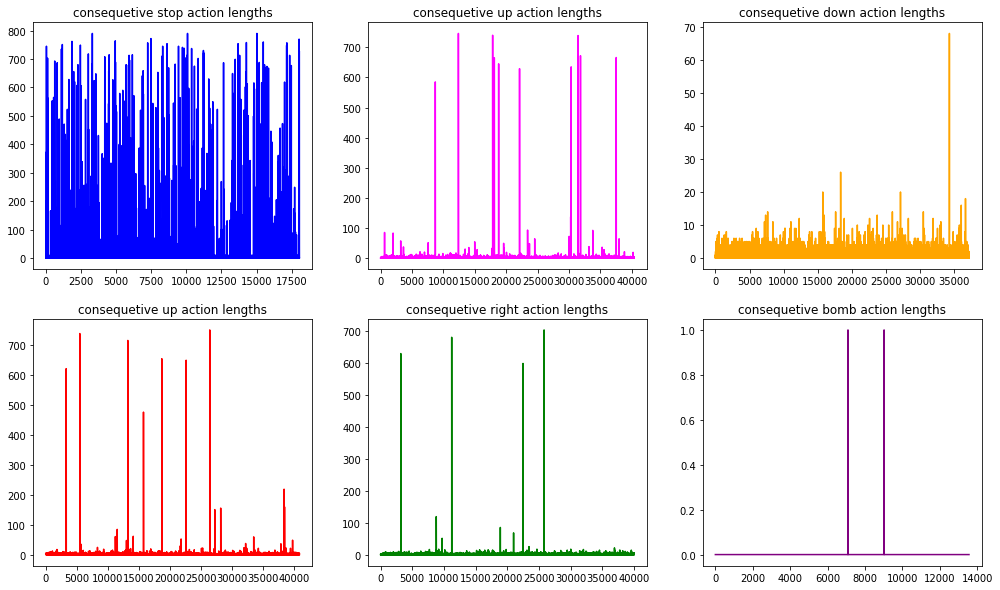

#### Agent 3 #####


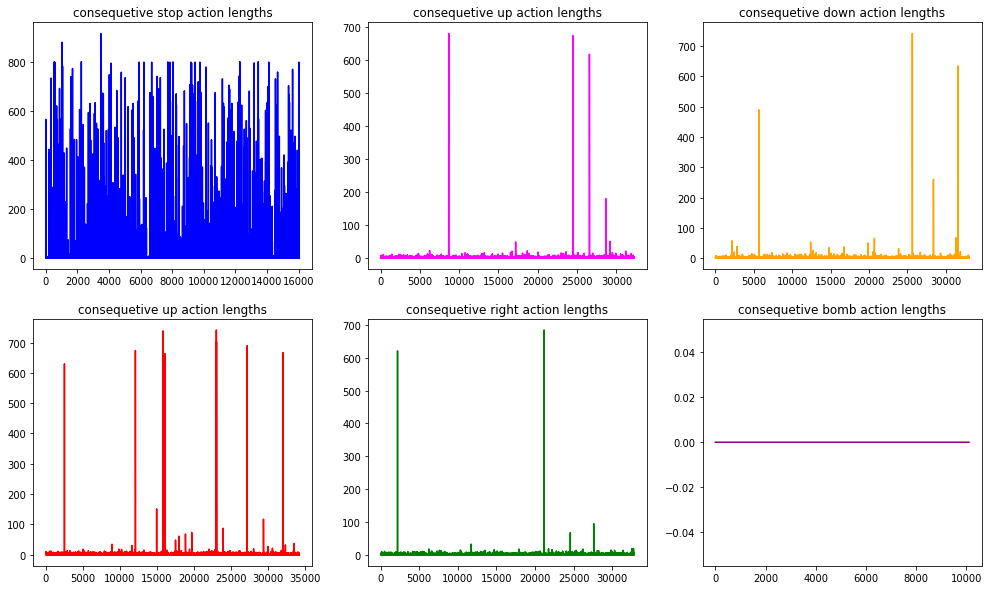

In [20]:
# the plots show the crappy actions (very lengthy one)
# it seems the SimpleAgent crashed to some deadlock or freezed because of some crappy heuristic?
def plot_conseq_actions(actions_length, label):
    """ for one agent """
    stop_length, up_length, down_length, left_length, right_length, bomb_length = actions_length
    beg = 0
    end = -1
    plt.figure(figsize=(17,10))
    plt.subplot(231)
    plt.plot(stop_length[beg:end], 'blue')
    plt.title('consequetive stop action lengths')
    plt.subplot(232)
    plt.plot(up_length[beg:end], 'magenta')
    plt.title('consequetive up action lengths')
    plt.subplot(233)
    plt.plot(down_length[beg:end], 'orange')
    plt.title('consequetive down action lengths')
    plt.subplot(234)
    plt.plot(left_length[beg:end], 'red')
    plt.title('consequetive up action lengths')
    plt.subplot(235)
    plt.plot(right_length[beg:end], 'green')
    plt.title('consequetive right action lengths')
    plt.subplot(236)
    plt.plot(bomb_length[beg:end], 'purple')
    plt.title('consequetive bomb action lengths')
    plt.show()

# plot the consequative actions for all agents
for i in range(labels.shape[1]):
    print("#### Agent %i #####" % i)
    actions_length = (stop_length[i], up_length[i], down_length[i], left_length[i], right_length[i], bomb_length[i])
    plot_conseq_actions(actions_length, labels[i])

# Balancing
The balancing could be done using Keras as well! This process is not aiming for a target balance value, but only avoid consequative actions by checking the nr_consequative action not to be bigger than a threshold.

In [21]:
def pick_idx(action_lengths, starts, ends):
    picked = np.empty(0)
    thresh = 10 # bomb life is also 10 - it seems to be a reasonable threshold .. 
                # .. for any action to be executed for this duration max
    for i, al in enumerate(action_lengths):
        if al == 0: # pick non-consequetive (=0)
            picked = np.append(picked, starts[i])
        elif al <= 10: # pick consequetive (<=thresh)
            picked = np.append(picked, np.arange(starts[i], ends[i]+1))
        else: # sample from consequetive actions longer than the threshold
            n = thresh + 5
            nr_samples = n if n < al else al
            sampled = np.random.choice(range(starts[i], ends[i]+1), nr_samples, replace=False)
            picked = np.append(picked, sampled)
        #print(len(picked))
    return picked

all_picked = [None] * labels.shape[1] # nr agents

for i in range(labels.shape[1]):
    print("#### Agent ", i)
    # stop
    _, _, starts, ends, stop_length = find_nonconseq_acts(stop_action, labels[:,i,:])
    stop_picked = pick_idx(stop_length, starts, ends)
    # up
    _, _, starts, ends, up_length = find_nonconseq_acts(up_action, labels[:,i,:])
    up_picked = pick_idx(up_length, starts, ends)
    # down
    _, _, starts, ends, down_length = find_nonconseq_acts(down_action, labels[:,i,:])
    down_picked = pick_idx(down_length, starts, ends)
    # left
    _, _, starts, ends, left_length = find_nonconseq_acts(left_action, labels[:,i,:])
    left_picked = pick_idx(left_length, starts, ends)
    # right
    _, _, starts, ends, right_length = find_nonconseq_acts(right_action, labels[:,i,:])
    right_picked = pick_idx(right_length, starts, ends)
    # bomb
    _, _, starts, ends, bomb_length = find_nonconseq_acts(bomb_action, labels[:,i,:])
    bomb_picked = pick_idx(bomb_length, starts, ends)
    # some stats
    len(stop_picked)
    len(up_picked)
    len(down_picked)
    len(left_picked)
    len(right_picked)
    len(bomb_picked)
    # put it all together
    all_picked[i] = np.concatenate([stop_picked, up_picked, down_picked, left_picked, right_picked, bomb_picked])
    # make sure don't have duplicate indices otherwise something's wrong with the perofrmed process
    assert len(np.unique(all_picked[i])) == len(all_picked[i])

#### Agent  0


53914

53895

55597

52658

59286

12310

#### Agent  1


48597

50993

42624

45598

50858

9864

#### Agent  2


51377

62762

53762

62120

58367

13558

#### Agent  3


51376

49357

50153

52486

48286

10113

# Store the picked indices
loading indices later and apply on each agent's gathered samples is easier than saving new datasets which occupies more memory as well!

#### Agent  0
picked indices: 287660 out of 464514 labels
before:  [0.47439259 0.11948833 0.12813177 0.11669401 0.13479249 0.02650082]
afterr:  [0.18742265 0.1873566  0.19327331 0.18305639 0.20609748 0.04279358]
287660


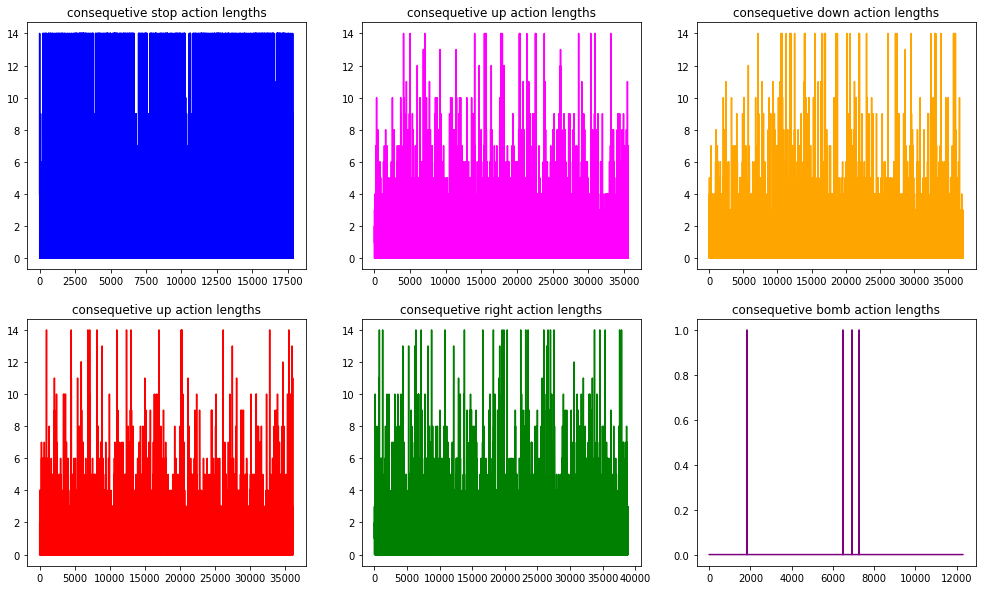

fraction of non-consequetive actions to the total action of same type: 


0.3319174982379345

0.6605993134799146

0.6686871593791032

0.6862205173003152

0.6563775596262187

0.9996750609260764

#### Agent  1
picked indices: 248534 out of 464514 labels
before:  [0.5438286  0.11794908 0.09323939 0.10137477 0.12237306 0.0212351 ]
afterr:  [0.19553461 0.20517515 0.17150169 0.18346786 0.20463196 0.03968873]
248534


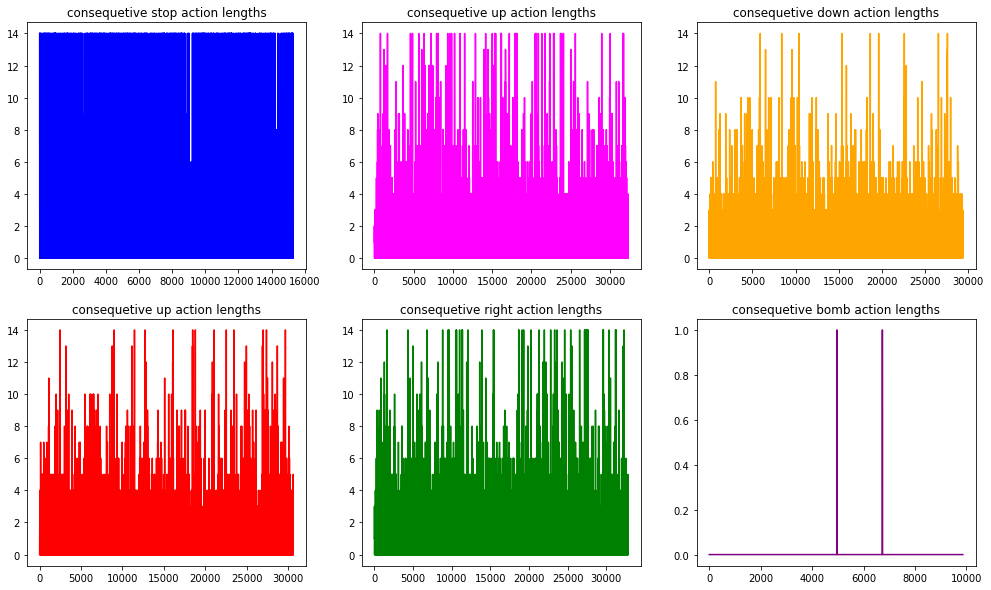

fraction of non-consequetive actions to the total action of same type: 


0.31506060044858736

0.633714431392544

0.6888841966966966

0.6719154348874951

0.6452475520075505

0.9997972424979724

#### Agent  2
picked indices: 301946 out of 464514 labels
before:  [0.42555445 0.15149597 0.11595775 0.14590303 0.1319013  0.02918749]
afterr:  [0.17015294 0.20785836 0.1780517  0.20573215 0.19330278 0.04490207]
301946


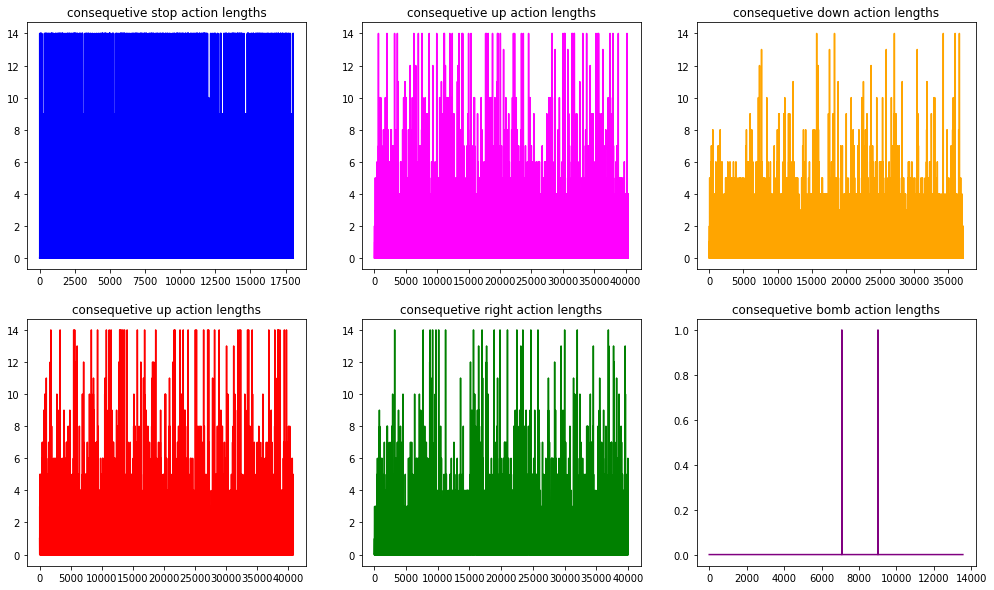

fraction of non-consequetive actions to the total action of same type: 


0.35132452264632036

0.6434626047608425

0.6908225140433764

0.6567772054088861

0.6859184128017544

0.9998524856173477

#### Agent  3
picked indices: 261771 out of 464514 labels
before:  [0.52052683 0.11117857 0.11331844 0.12606509 0.10713994 0.02177114]
afterr:  [0.19626315 0.1885503  0.19159112 0.20050349 0.18445894 0.038633  ]
261771


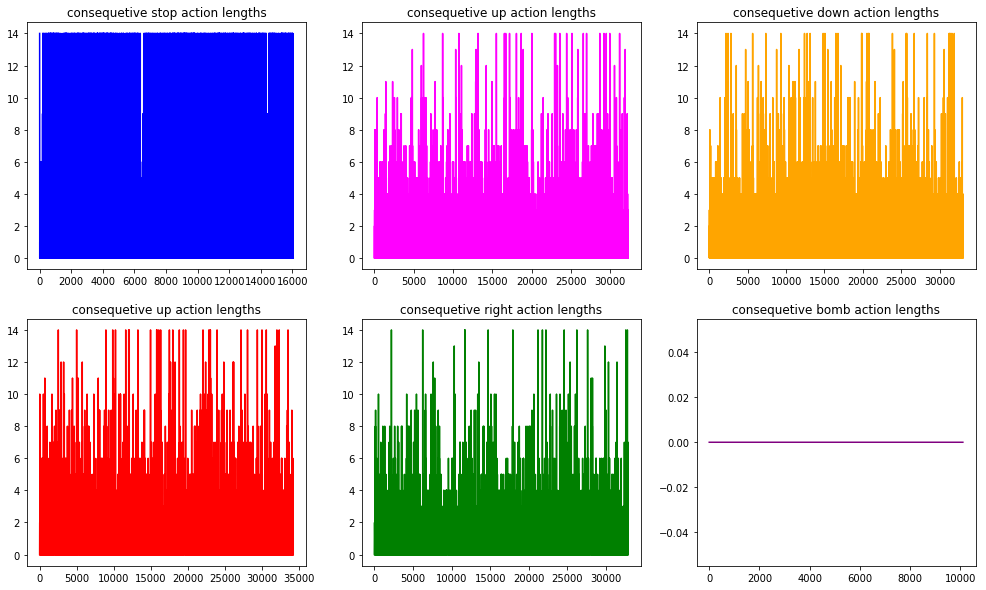

fraction of non-consequetive actions to the total action of same type: 


0.3125194643413267

0.6536864071965476

0.6582258289633721

0.6518119117478947

0.6802592884065775

1.0

In [22]:
picked_indices = []
for i in range(len(all_picked)):
    print("#### Agent ", i)
    # some stats
    print("picked indices: %i out of %i labels" % (len(all_picked[i]), len(labels[:,i,:])) )
    print("before: ", np.sum(labels[:,i,:], axis=0) / len(labels)) # proportion of labels
    picked_indices.append(np.sort(all_picked[i].astype('int')))
    y = labels[picked_indices[i],i,:]
    print("afterr: ", np.sum(y, axis=0) / len(y)) # proportion of picked labels -> make sure it is more balanced now
    print(len(picked_indices[i]))
    
    # see now how it looks like:
    _, count1, _, _, stop_length = find_nonconseq_acts(stop_action, y)
    _, count2, _, _, up_length = find_nonconseq_acts(up_action, y)
    _, count3, _, _, down_length = find_nonconseq_acts(down_action, y)
    _, count4, _, _, left_length = find_nonconseq_acts(left_action, y)
    _, count5, _, _, right_length = find_nonconseq_acts(right_action, y)
    _, count6, _, _, bomb_length = find_nonconseq_acts(bomb_action, y)
    actions_length = (stop_length, up_length, down_length, left_length, right_length, bomb_length)
    plot_conseq_actions(actions_length, y)
    print("fraction of non-consequetive actions to the total action of same type: ")
    y_sum = np.sum(y, axis=0)
    count1/y_sum[0]
    count2/y_sum[1]
    count3/y_sum[2]
    count4/y_sum[3]
    count5/y_sum[4]
    count6/y_sum[5]
    # make sure the original order preserved (although it may not matter that much!)
    #y[:10]
    #labels[:10,i,:]
    
# store the indices for each gathered sample of each agent
np.save(path_to_save_indices, picked_indices)

In [23]:
# obs_picked = obs[picked_indices]
# assert len(y) == len(obs_picked)
# np.save('dataset/labels_balanced.npy', y)
# np.save('dataset/obs_balanced.npy', obs_picked)

In [24]:
# obs_quarter = obs[:len(obs)//4,:]
# len(obs_picked) // 4

# y_2 = y[:len(y) // 4]
# obs_2 = obs_picked[:len(y) // 4]

# print("y_2 len: ", len(y_2))
# print("obs_2 len: ", len(obs_2))

# np.save('dataset/labels_small.npy', y)
# np.save('dataset/obs_small.npy', obs_2)